In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime
import hvplot.pandas
import holoviews as hv
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_excel('BouncebackCSV.xlsx', index_col="Player")
# data = data.set_index('Player', inplace=True)
data

,Basic POS,15-16 AGE,15-16 FP,15-16 GP,15-16 RNK,15-16 FPPG,16-17 AGE,16-17 FP,16-17 GP,16-17 RNK,...,21-22 AGE,21-22 FP,21-22 GP,21-22 RNK,21-22 FPPG,22-23 AGE,22-23 FP,22-23 GP or MIN,22-23 RNK,22-23 FPPG
Player,,,,,,,,,,,,,,,,,,,,,
Connor McDavid,F,19,87.7,45,325,1.948889,20,187.5,82,13,...,25,241.4,80,3,3.017500,26,320.1,82,1,3.903659
Leon Draisaitl,F,20,100.6,72,253,1.397222,21,158.8,82,46,...,26,231.6,80,6,2.895000,27,263.3,80,2,3.291250
Elias Pettersson,F,0,0.0,0,0,0.000000,0,0.0,0,0,...,23,160.1,80,70,2.001250,24,235.6,80,6,2.945000
David Pastrnak,F,19,65.0,51,471,1.274510,20,165.4,75,35,...,25,174.5,72,48,2.423611,26,258.8,82,3,3.156098
Auston Matthews,F,0,0.0,0,0,0.000000,19,180.0,82,19,...,24,253.0,73,2,3.465753,25,225.5,74,8,3.047297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Carter Hutton,G,30,47.2,979,581,2.892748,31,71.0,1459,446,...,36,-21.4,116,1293,-11.068966,0,0.0,0,0,0.000000
Veini Vehvilainen,G,0,0.0,0,0,0.000000,0,0.0,0,0,...,0,0.0,0,0,0.000000,0,0.0,0,0,0.000000
Michael DiPietro,G,0,0.0,0,0,0.000000,0,0.0,0,0,...,22,-3.2,57,1268,-3.368421,0,0.0,0,0,0.000000


In [47]:
fppg = data[['15-16 FPPG', '16-17 FPPG', '17-18 FPPG', '18-19 FPPG', '19-20 FPPG', '20-21 FPPG', '21-22 FPPG', '22-23 FPPG']]

In [48]:
fppg

,15-16 FPPG,16-17 FPPG,17-18 FPPG,18-19 FPPG,19-20 FPPG,20-21 FPPG,21-22 FPPG,22-23 FPPG
Player,,,,,,,,
Connor McDavid,1.948889,2.286585,2.612195,2.787179,2.912500,3.475000,3.017500,3.903659
Leon Draisaitl,1.397222,1.936585,1.767949,2.595122,2.943662,2.821429,2.895000,3.291250
Elias Pettersson,0.000000,0.000000,0.000000,2.100000,2.183824,1.765385,2.001250,2.945000
David Pastrnak,1.274510,2.205333,2.117073,2.684848,2.937143,2.137500,2.423611,3.156098
Auston Matthews,0.000000,2.195122,2.488710,2.616176,2.892857,3.171154,3.465753,3.047297
...,...,...,...,...,...,...,...,...
Carter Hutton,2.892748,2.919808,4.427329,1.538028,1.176338,-1.120000,-11.068966,0.000000
Veini Vehvilainen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Michael DiPietro,0.000000,0.000000,0.000000,-10.600000,-6.000000,0.000000,-3.368421,0.000000


In [49]:
fppg = fppg.head(500)
bouncebacks = ['Connor Brown', 'Jonathan Huberdeau', 'Scott Perunovich', 'Josh Norris', 'Max Pacioretty', 'Teuvo Teravainen', 'Ryan Strome', 'Brad Marchand', 'Patrick Kane', 'Vladimir Tarasenko', 'Matt Dumba', 'Filip Forsberg']

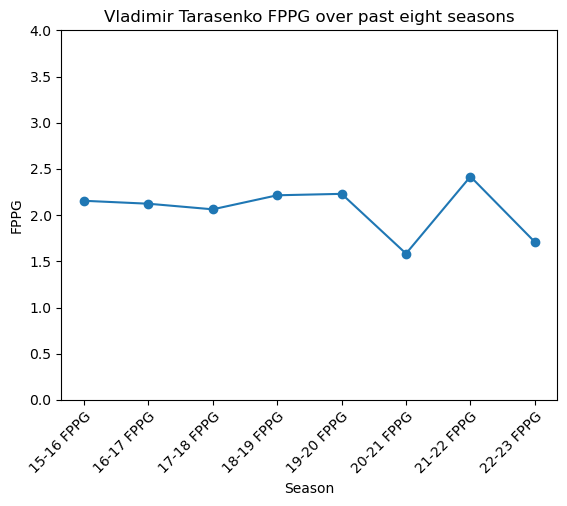

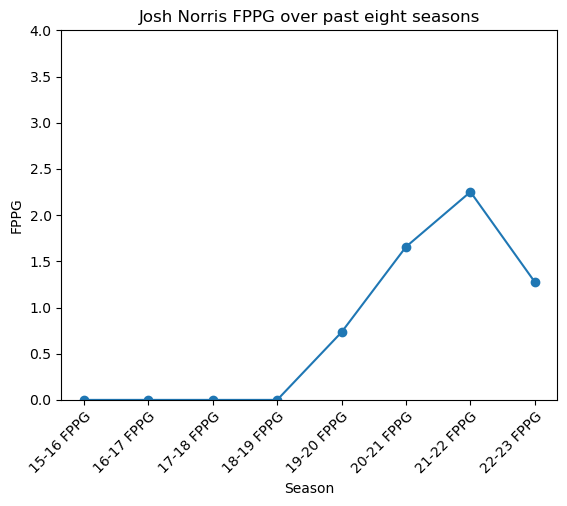

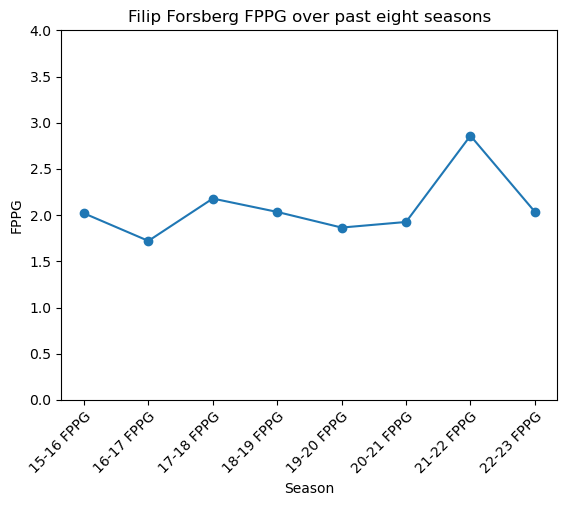

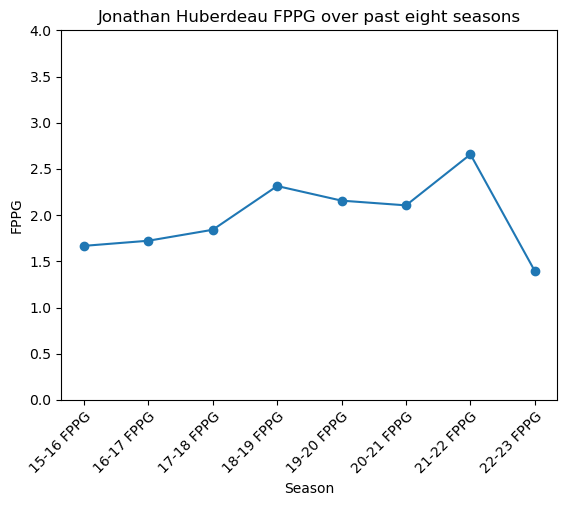

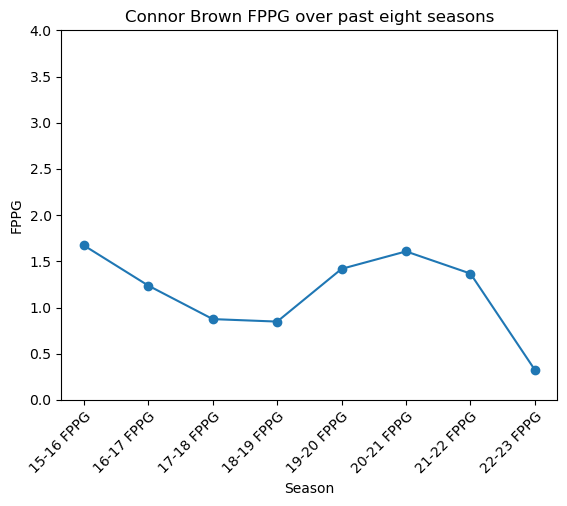

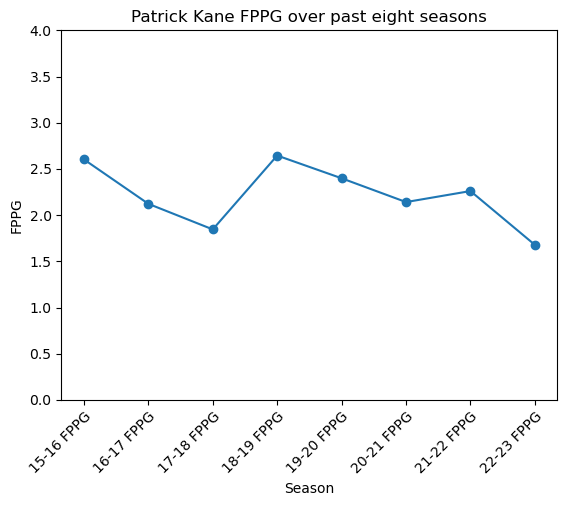

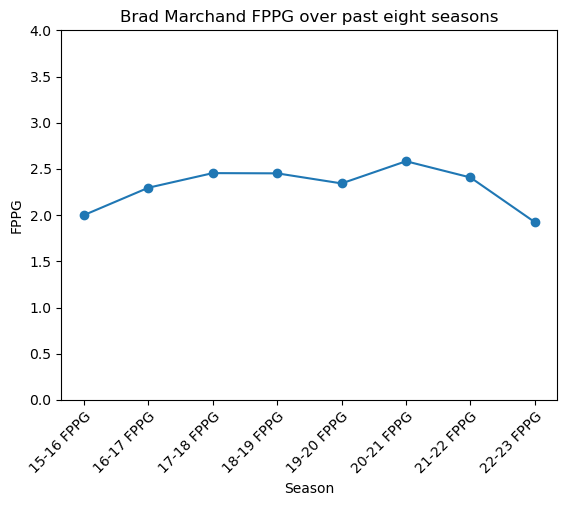

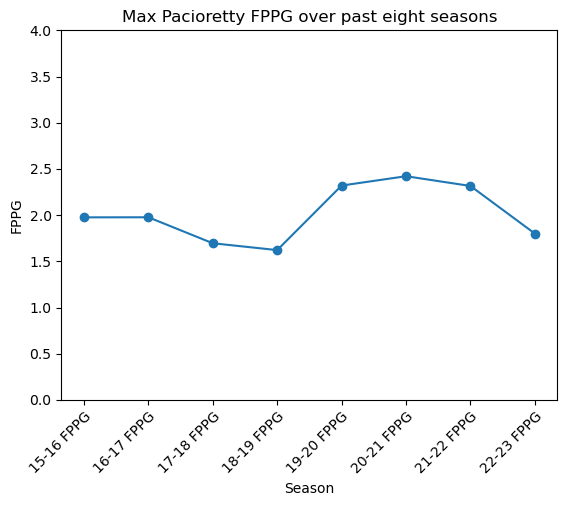

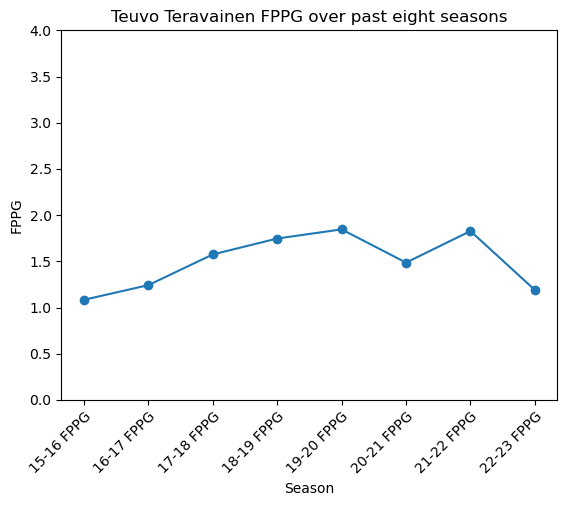

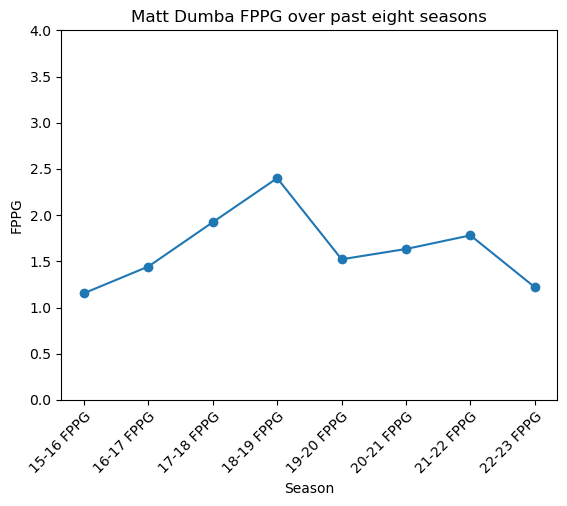

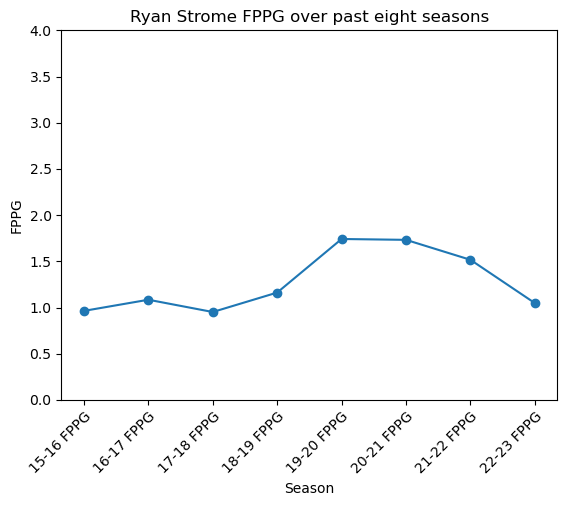

In [64]:
# Iterate through each player and plot
y_ticks = np.arange(0, 4.5, 0.5)

for player in fppg.index:
    if player in bouncebacks:
        plt.figure()  # Create a new figure
    
        # Select data for the player
        player_data = fppg.loc[player]

        # Plot the data
        player_data.plot(marker='o', label=player)

        # Set labels and title
        plt.xlabel('Season')
        plt.ylabel('FPPG')
        plt.title(f'{player} FPPG over past eight seasons')

        plt.ylim(0, 4)
        plt.yticks(y_ticks)
        plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

        # Add legend
    #     plt.legend()
        plt.savefig(f'bouncebacks/{player}_FPPG_Plot.png', dpi=300, bbox_inches='tight')
        # Show the plot
        plt.show()

Connor McDavid
Alexandar Georgiev
Connor Hellebuyck
Jakob Chychrun
Filip Gustavsson
Ilya Samsonov
Martin Necas
Jeremy Swayman
Joonas Korpisalo
Adin Hill
Shane Pinto
Pheonix Copley
Wade Allison
Ty Dellandrea


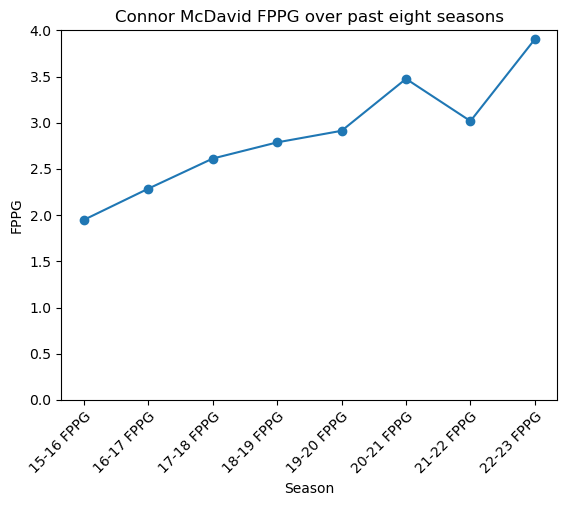

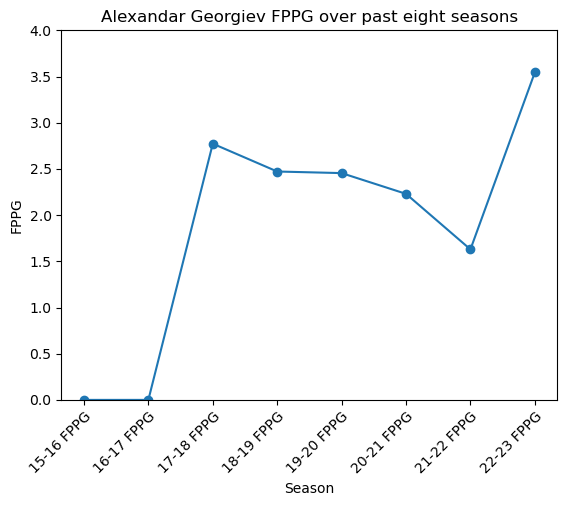

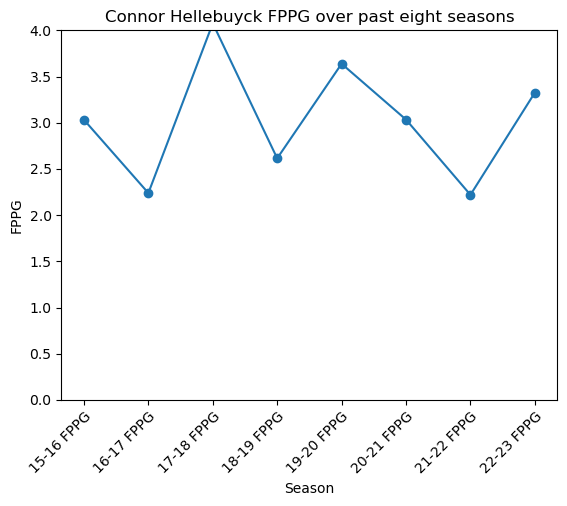

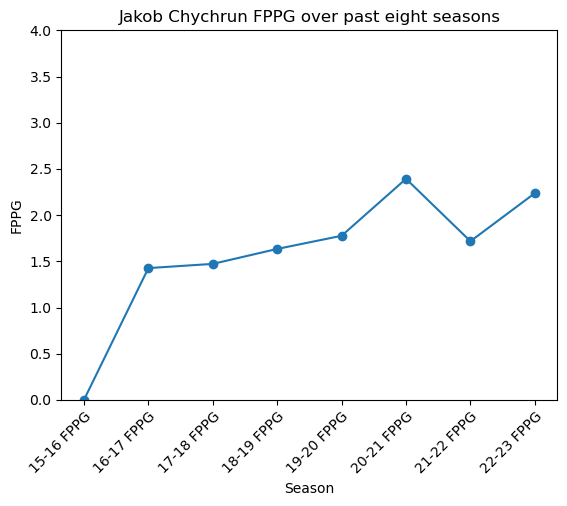

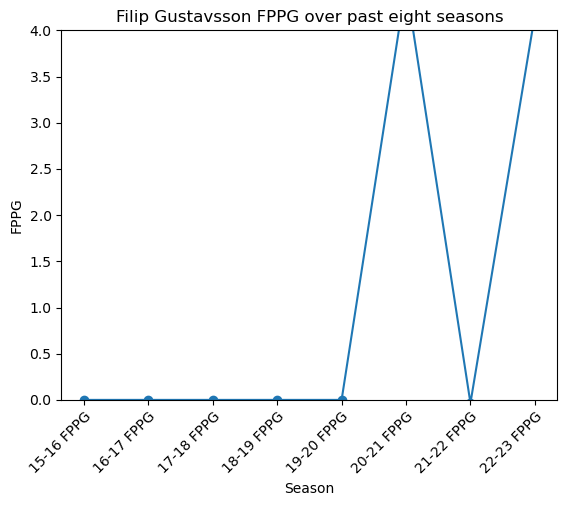

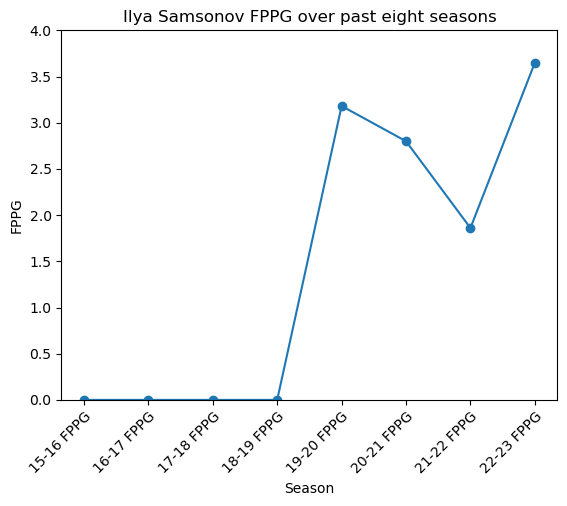

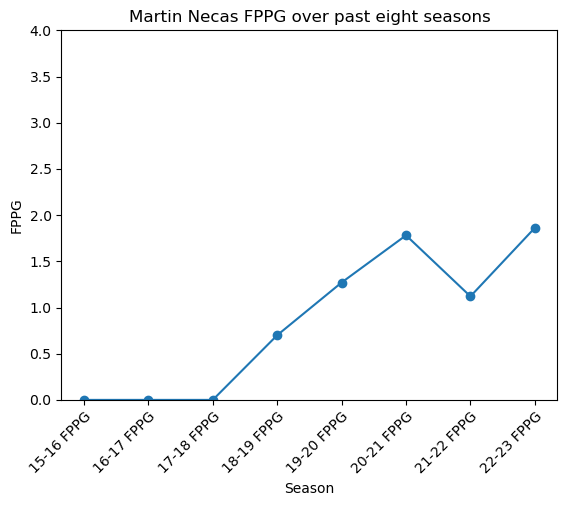

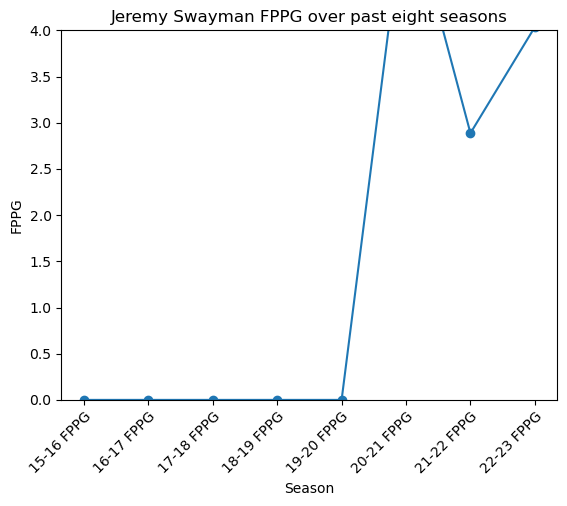

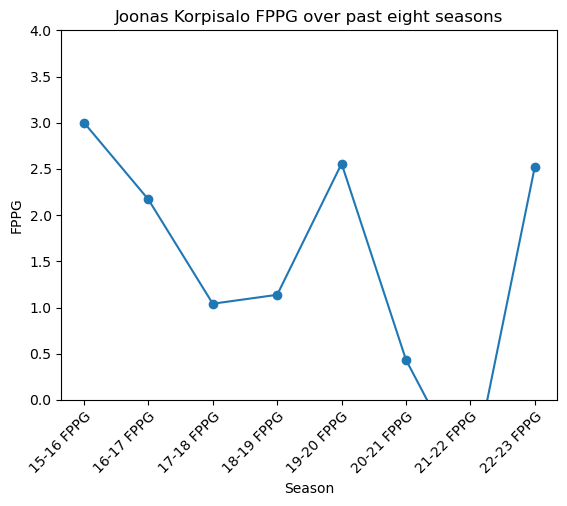

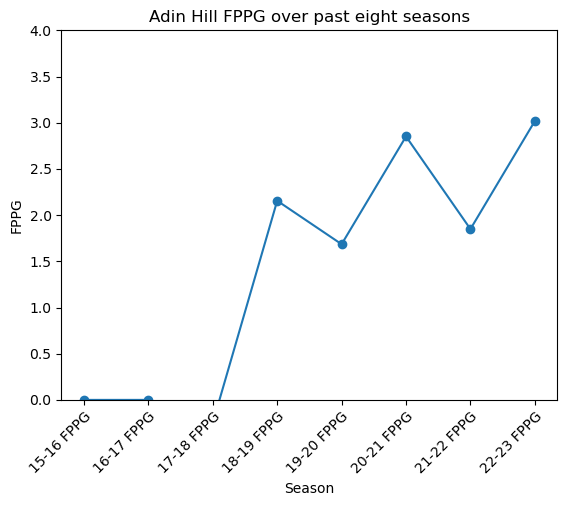

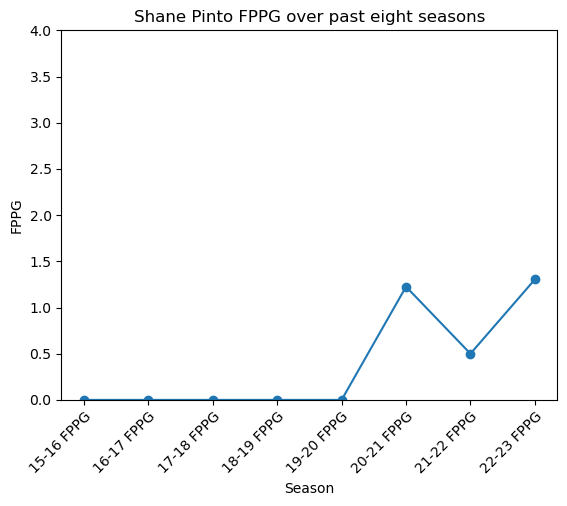

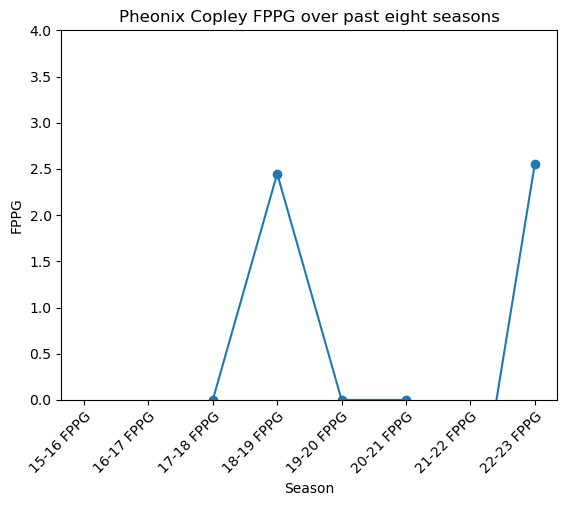

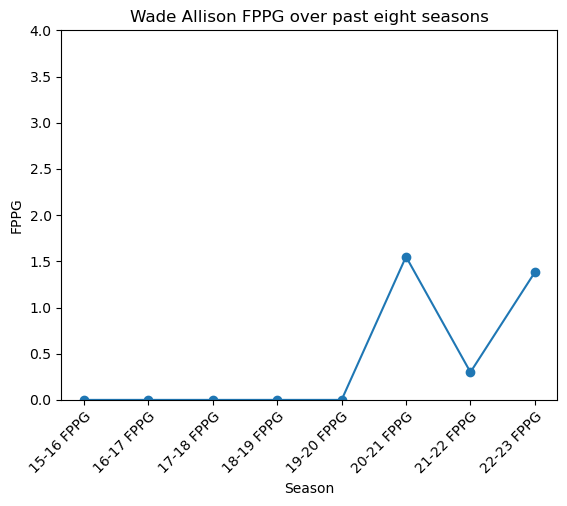

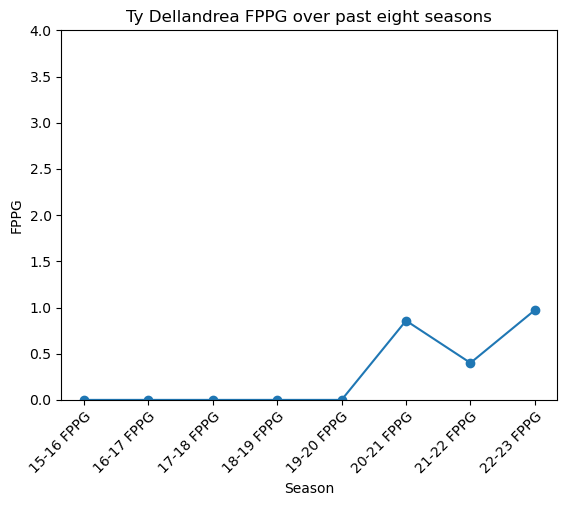

In [66]:
bouncebacks_22_23 = []
for player in fppg.index:
    player_data = fppg.loc[player]
    if (player_data['21-22 FPPG'] - player_data['20-21 FPPG']) < -0.4:
        if (player_data['22-23 FPPG'] - player_data['21-22 FPPG']) > 0.4:
            print(player)
            bouncebacks_22_23.append(player)
            
for player in fppg.index:
    if player in bouncebacks_22_23:
        plt.figure()  # Create a new figure
    
        # Select data for the player
        player_data = fppg.loc[player]

        # Plot the data
        player_data.plot(marker='o', label=player)

        # Set labels and title
        plt.xlabel('Season')
        plt.ylabel('FPPG')
        plt.title(f'{player} FPPG over past eight seasons')

        plt.ylim(0, 4)
        plt.yticks(y_ticks)
        plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
        plt.savefig(f'bouncebacks2223/{player}_FPPG_Plot.png', dpi=300, bbox_inches='tight')
        # Add legend
    #     plt.legend()

        # Show the plot
        plt.show()

Igor Shesterkin
Nikita Kucherov
Pierre-Luc Dubois
Dylan Larkin
Steven Stamkos
Vladimir Tarasenko
Evgeni Malkin
Patrik Laine
Tony DeAngelo
Carter Hart
Frederik Andersen
Ben Chiarot
Cam Fowler
Jacob Markstrom
Damon Severson
Martin Fehervary
Jonas Siegenthaler
Darcy Kuemper
Morgan Frost
Erik Johnson


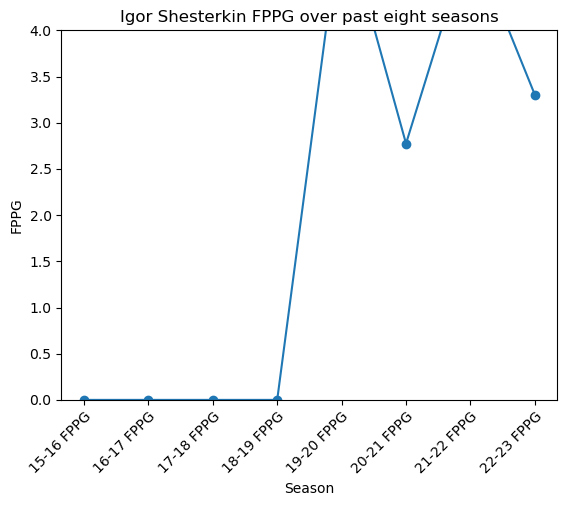

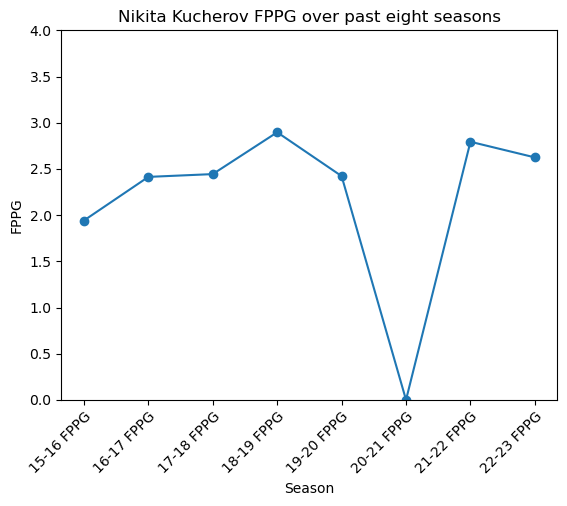

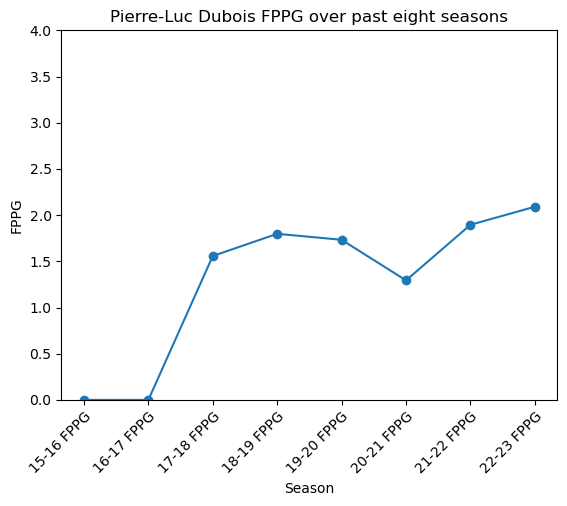

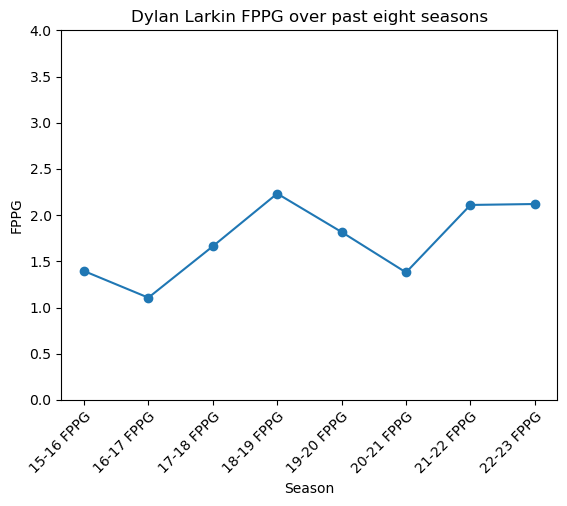

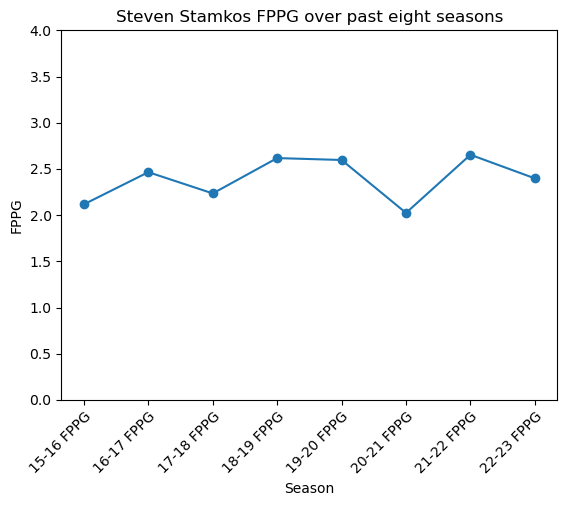

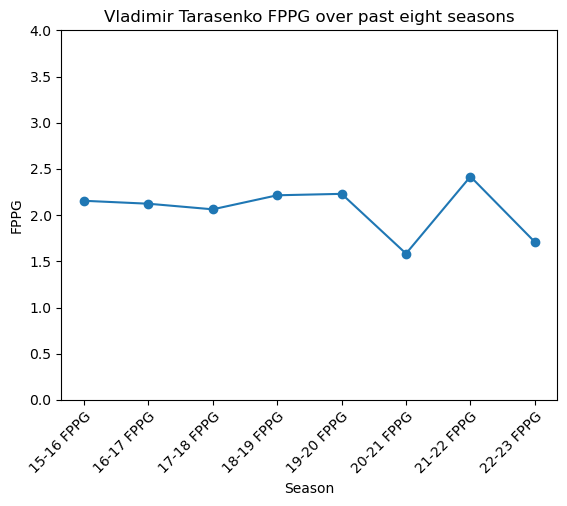

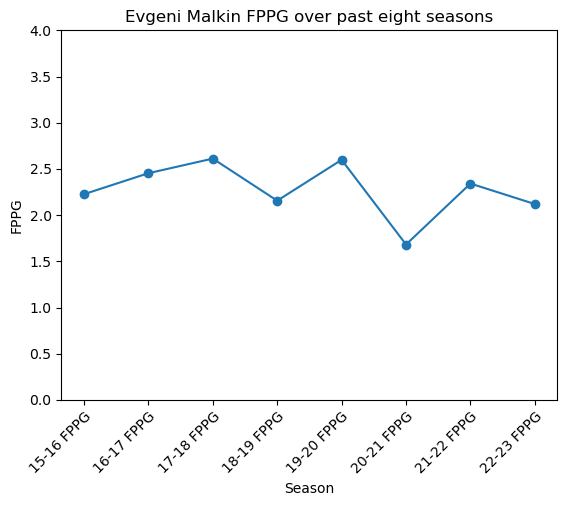

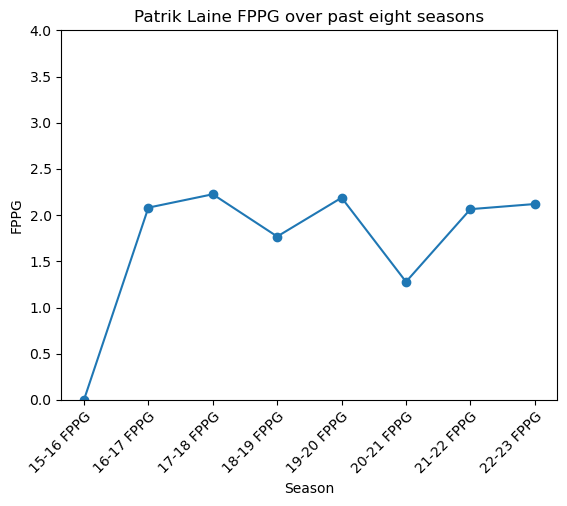

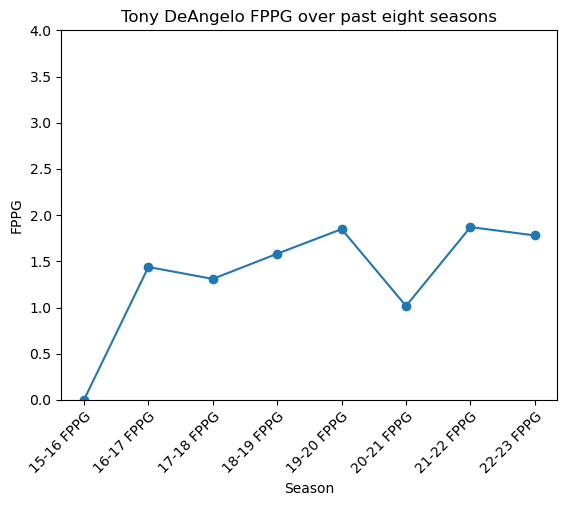

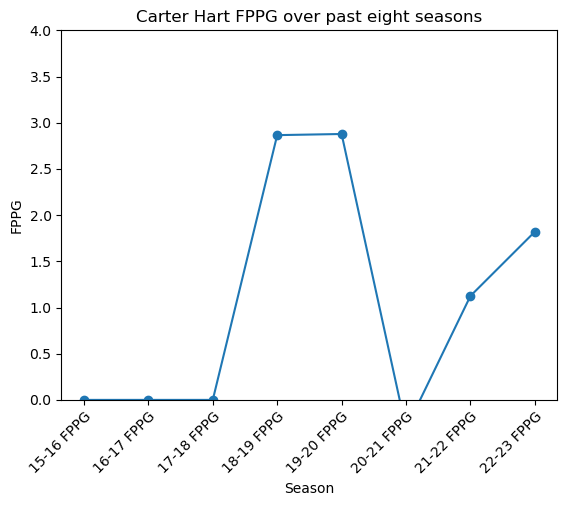

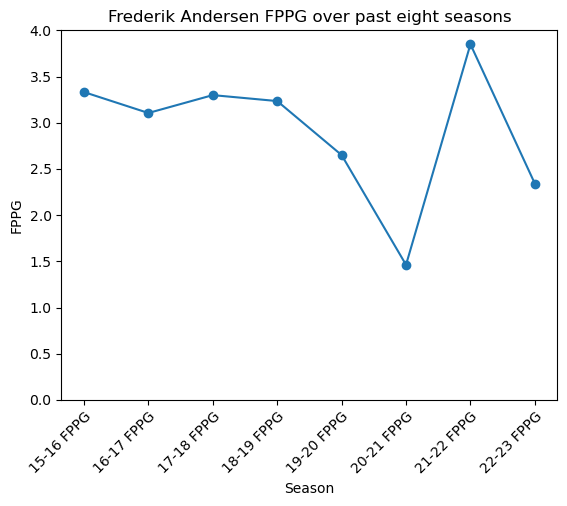

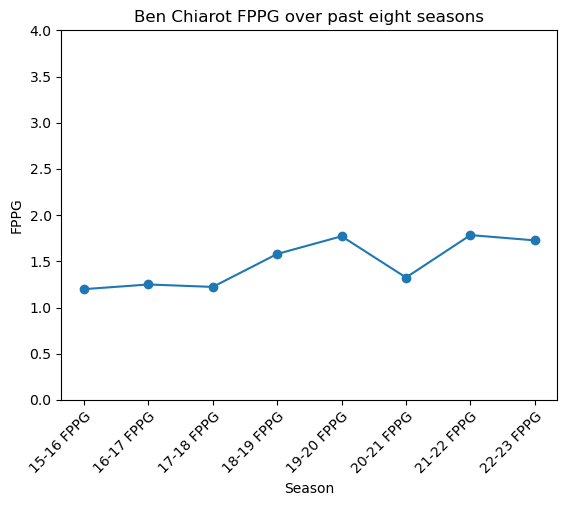

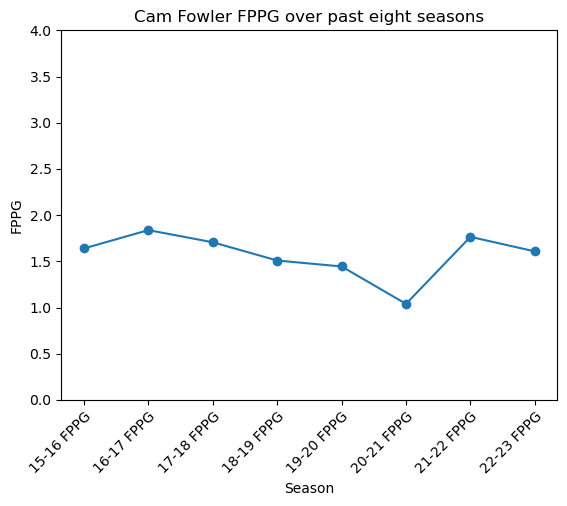

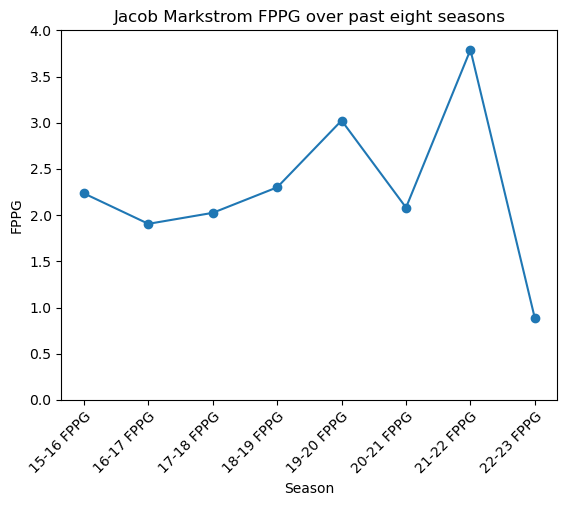

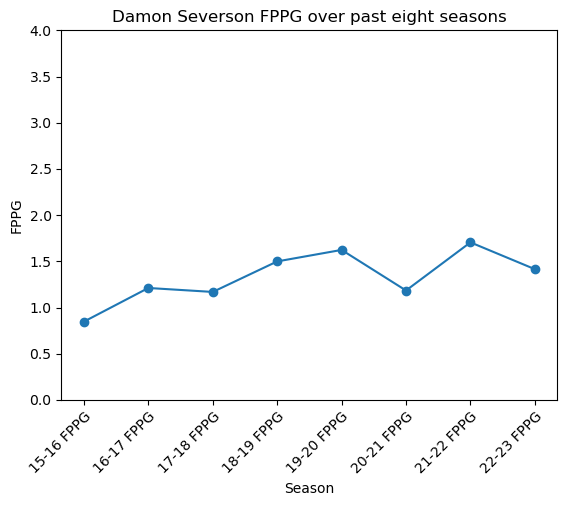

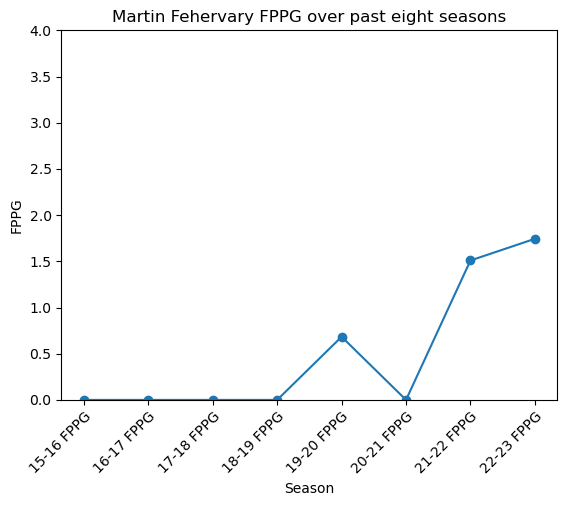

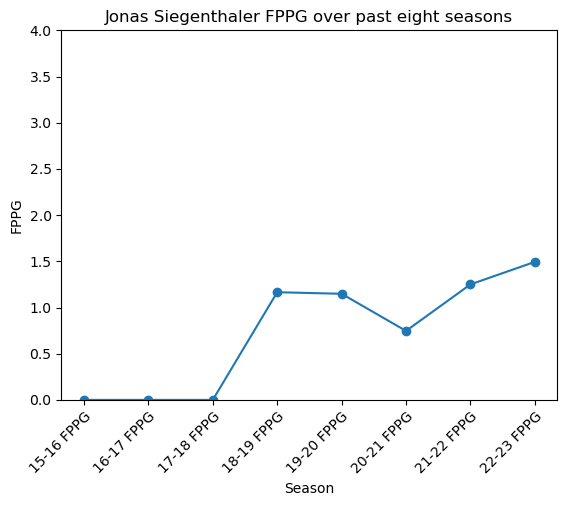

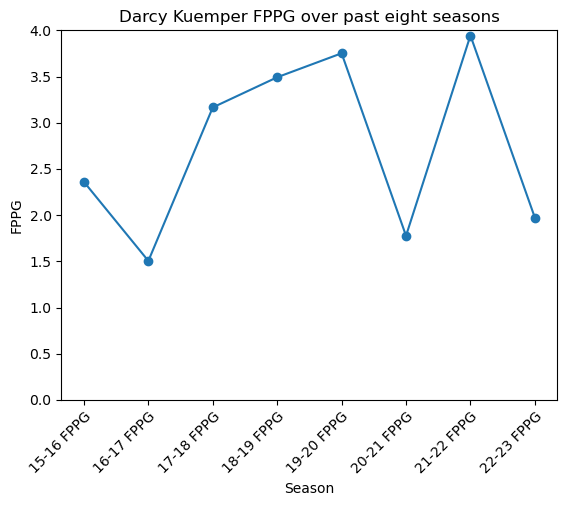

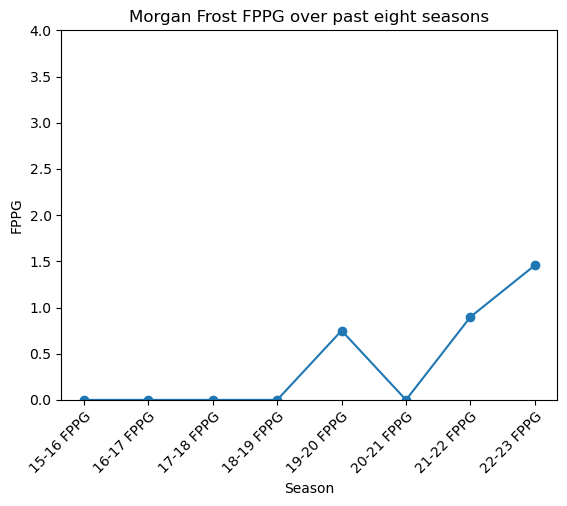

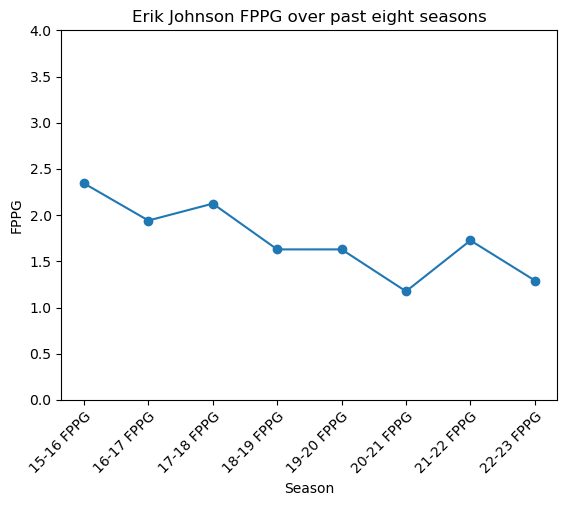

In [71]:
bouncebacks_21_22 = []
for player in fppg.index:
    player_data = fppg.loc[player]
    if (player_data['20-21 FPPG'] - player_data['19-20 FPPG']) < -0.4:
        if (player_data['21-22 FPPG'] - player_data['20-21 FPPG']) > 0.4:
            print(player)
            bouncebacks_21_22.append(player)
            
for player in fppg.index:
    if player in bouncebacks_21_22:
        plt.figure()  # Create a new figure
    
        # Select data for the player
        player_data = fppg.loc[player]

        # Plot the data
        player_data.plot(marker='o', label=player)

        # Set labels and title
        plt.xlabel('Season')
        plt.ylabel('FPPG')
        plt.title(f'{player} FPPG over past eight seasons')

        plt.ylim(0, 4)
        plt.yticks(y_ticks)
        plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
        
        plt.savefig(f'bouncebacks2122/{player}_FPPG_Plot.png', dpi=300, bbox_inches='tight')

        # Add legend
    #     plt.legend()

        # Show the plot
        plt.show()
        
        if player == 'Patrik Laine':
            laine = player_data

Tage Thompson
Juuse Saros
Aleksander Barkov
Andrei Vasilevskiy
Alex DeBrincat
Justin Faulk
Evan Bouchard
Eeli Tolvanen
Joe Pavelski
Juuso Valimaki
Tyson Barrie
Shayne Gostisbehere
Gustav Forsling
Michael Bunting
Michael Rasmussen
Sergei Bobrovsky
Josh Anderson
Adin Hill
Nino Niederreiter
Marc-Andre Fleury
Jack Campbell
Frederick Gaudreau
Nathan Bastian


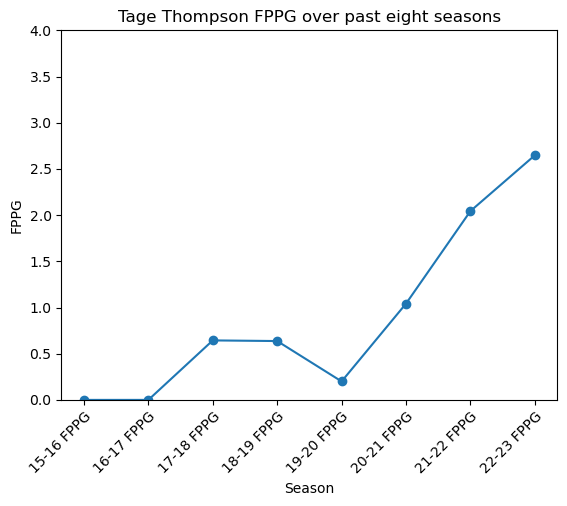

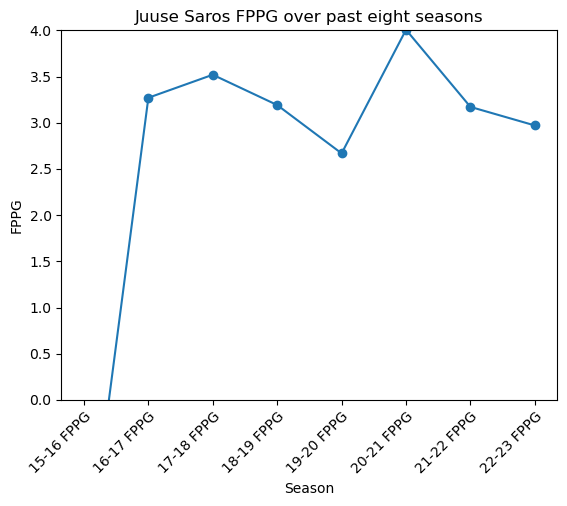

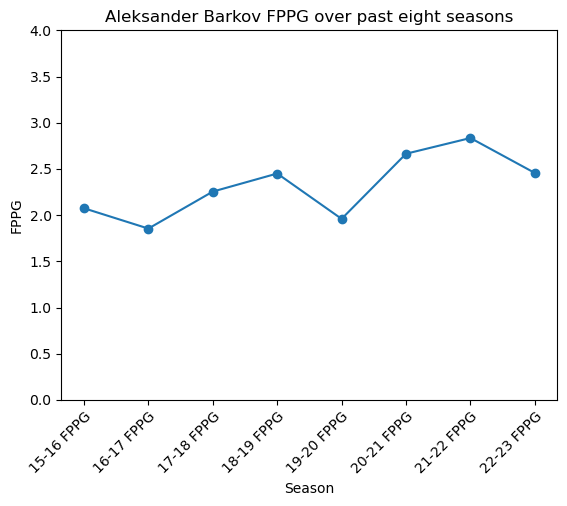

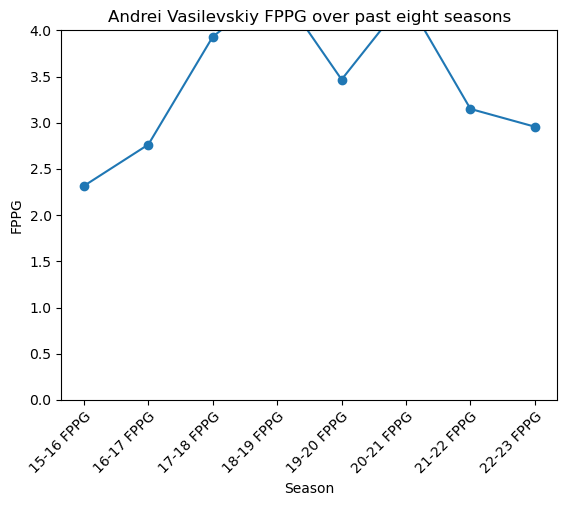

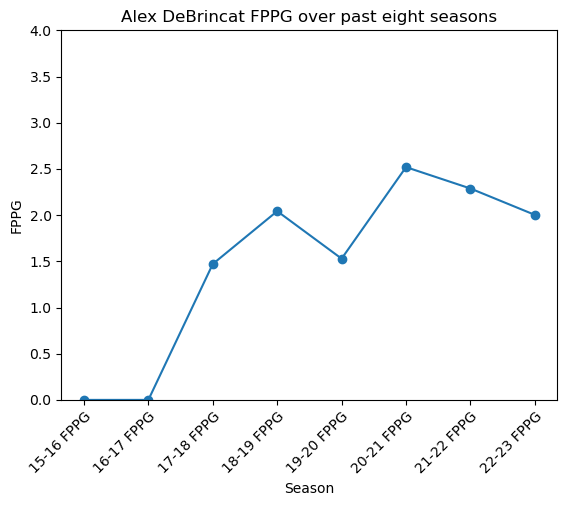

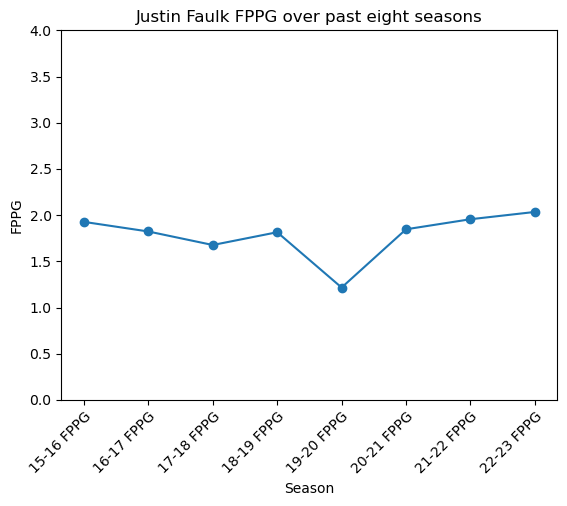

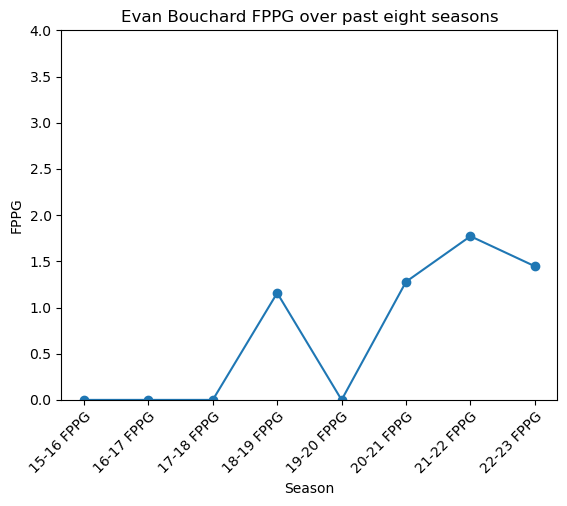

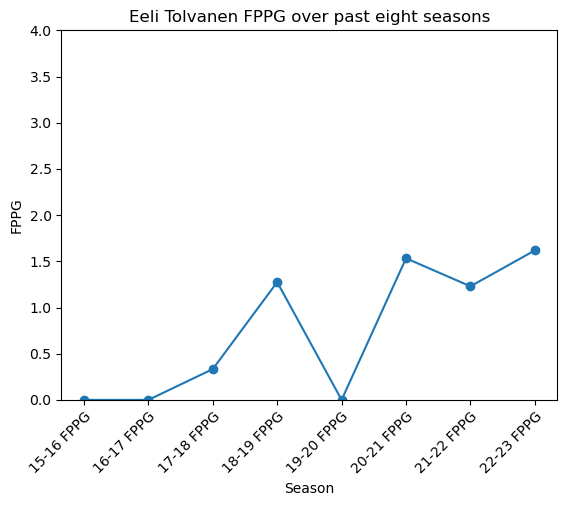

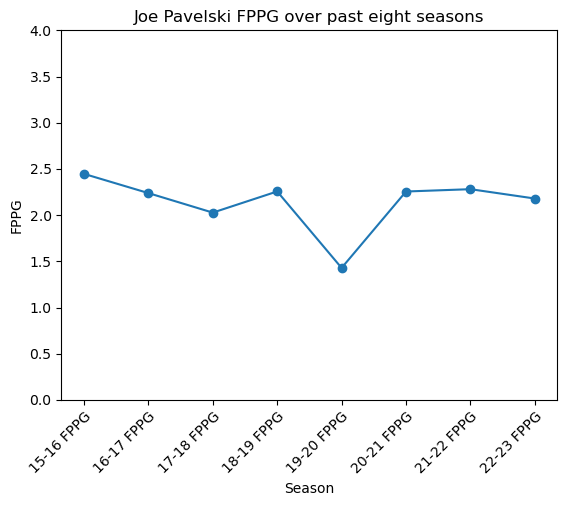

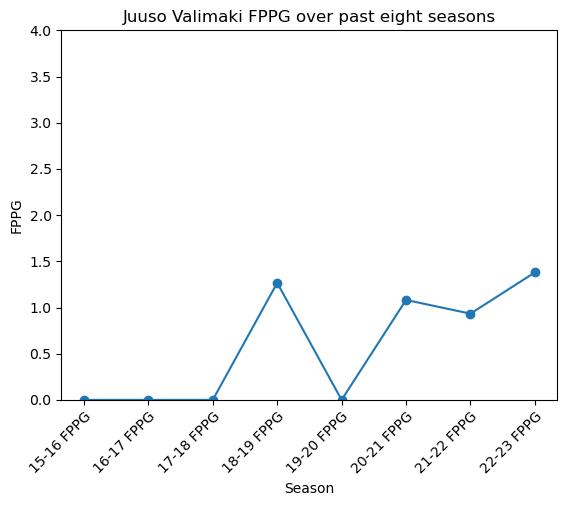

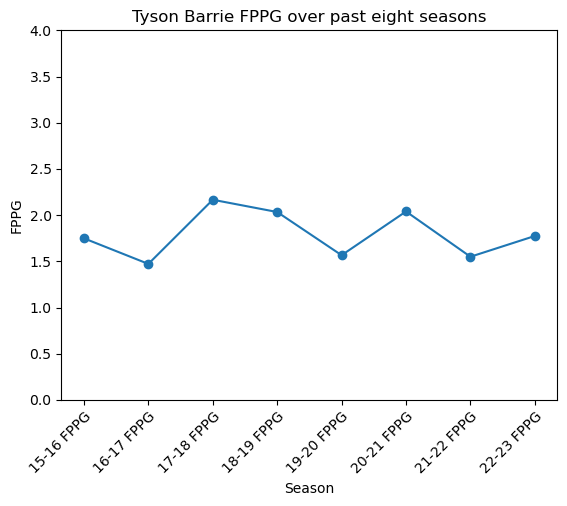

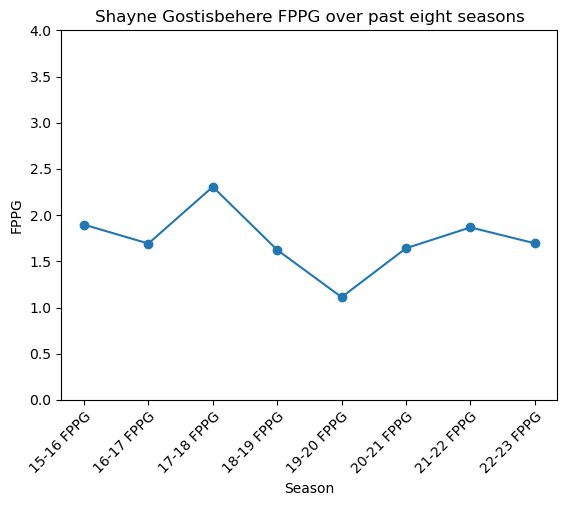

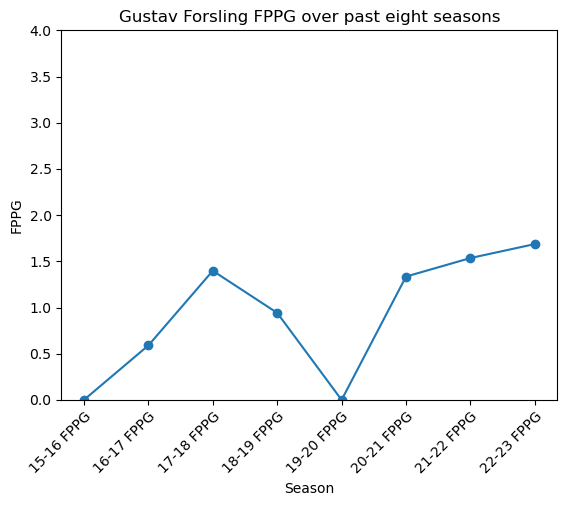

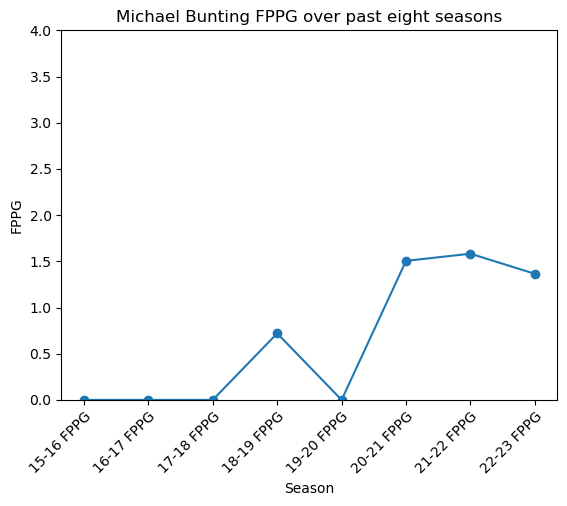

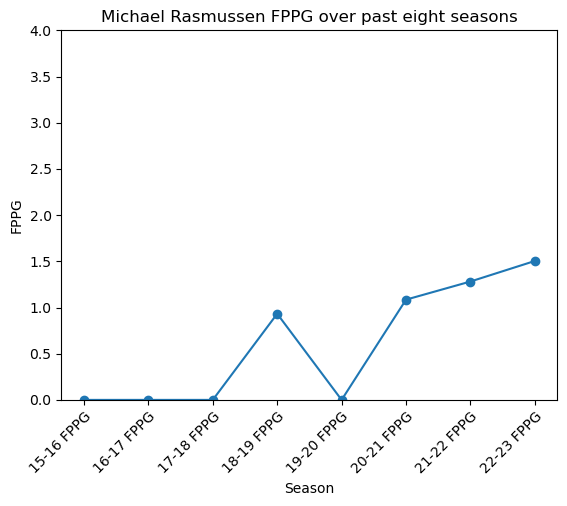

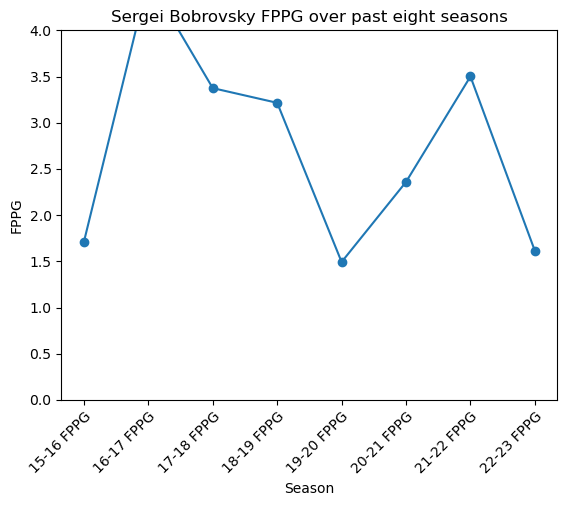

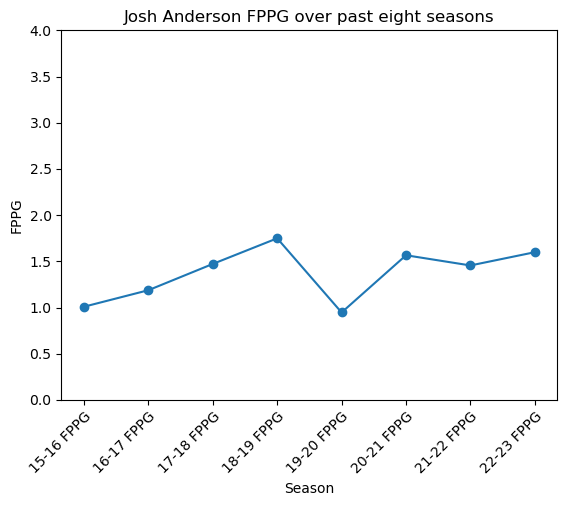

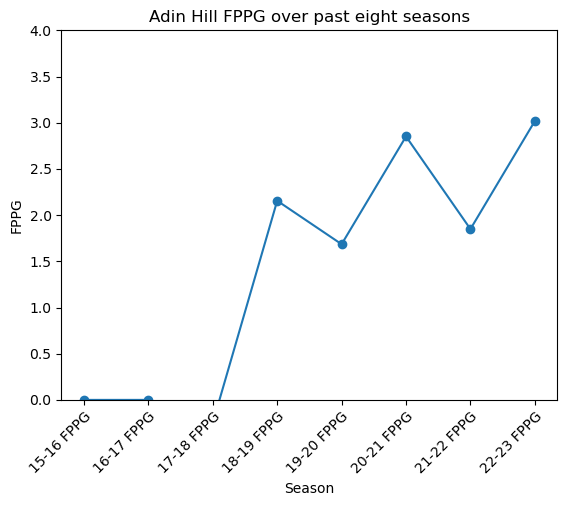

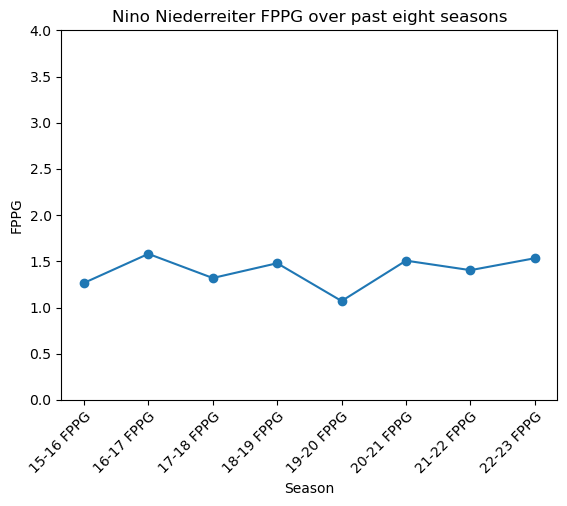

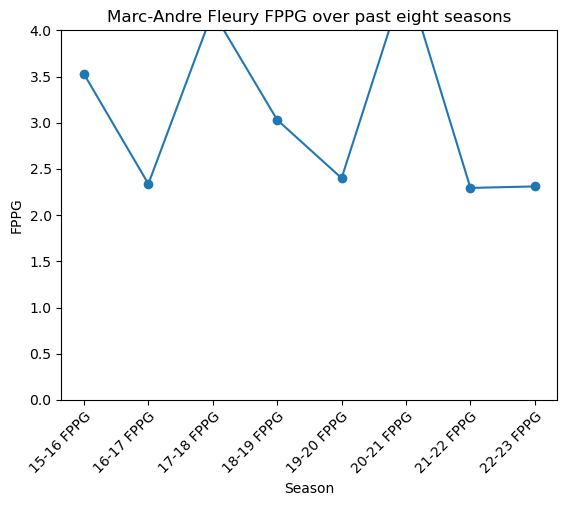

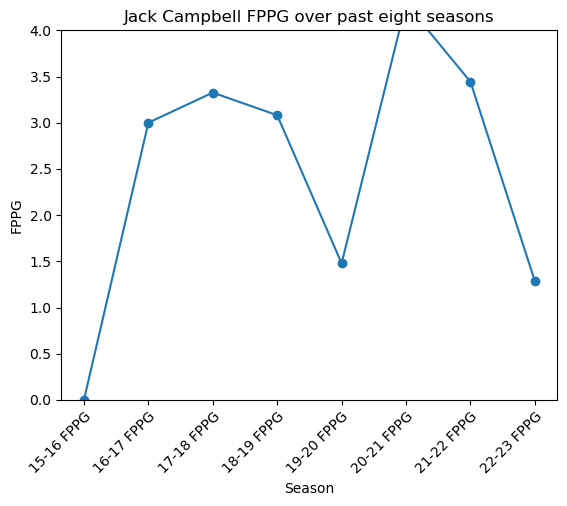

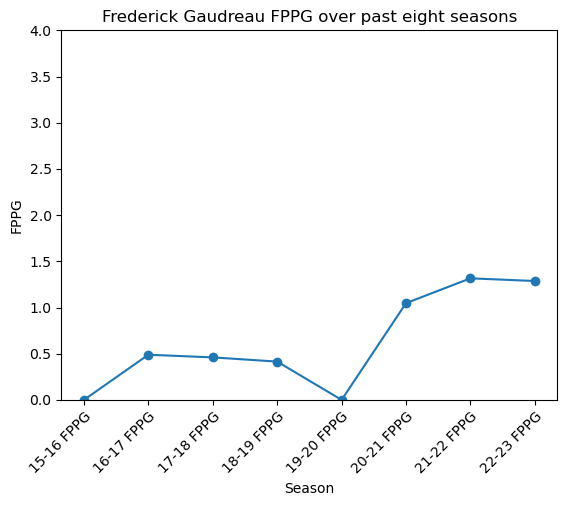

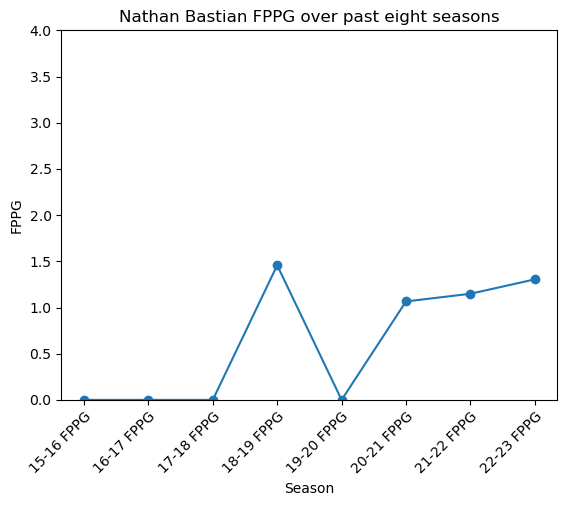

In [72]:
bouncebacks_20_21 = []
for player in fppg.index:
    player_data = fppg.loc[player]
    if (player_data['19-20 FPPG'] - player_data['18-19 FPPG']) < -0.4:
        if (player_data['20-21 FPPG'] - player_data['19-20 FPPG']) > 0.4:
            print(player)
            bouncebacks_20_21.append(player)
            
for player in fppg.index:
    if player in bouncebacks_20_21:
        plt.figure()  # Create a new figure
    
        # Select data for the player
        player_data = fppg.loc[player]

        # Plot the data
        player_data.plot(marker='o', label=player)

        # Set labels and title
        plt.xlabel('Season')
        plt.ylabel('FPPG')
        plt.title(f'{player} FPPG over past eight seasons')

        plt.ylim(0, 4)
        plt.yticks(y_ticks)
        plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
        
        plt.savefig(f'bouncebacks2021/{player}_FPPG_Plot.png', dpi=300, bbox_inches='tight')
        
        

        # Add legend
    #     plt.legend()

        # Show the plot
        plt.show()
        
        if player == 'Joe Pavelski':
            pavelski = player_data

In [74]:
laine

15-16 FPPG    0.000000
16-17 FPPG    2.080822
17-18 FPPG    2.225610
18-19 FPPG    1.768293
19-20 FPPG    2.188235
20-21 FPPG    1.278261
21-22 FPPG    2.064286
22-23 FPPG    2.120000
Name: Patrik Laine, dtype: float64

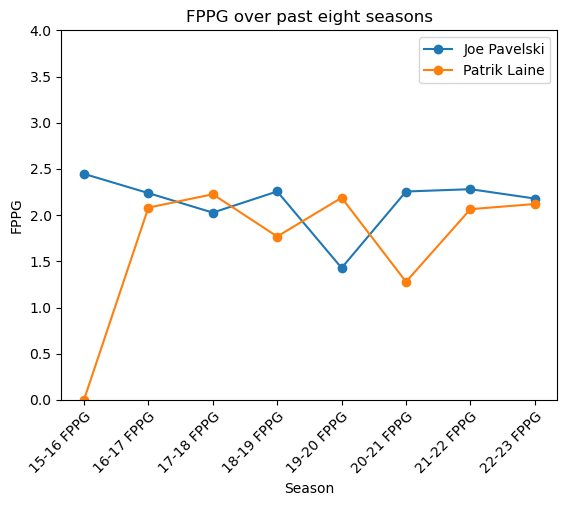

In [77]:
pavelski.plot(marker='o', label='Joe Pavelski')
laine.plot(marker='o', label='Patrik Laine')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('FPPG')
plt.title(f'FPPG over past eight seasons')

plt.ylim(0, 4)
plt.yticks(y_ticks)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.legend()

plt.savefig(f'laine_pavelski_FPPG_Plot.png', dpi=300, bbox_inches='tight')



# Add legend


# Show the plot
plt.show()

In [42]:
def Kmeans (dataframe, num_clusters):
    
    # Initialize the K-Means model using the best value for k
    model = KMeans(n_clusters=num_clusters, random_state=1)
    
    # Fit the K-Means model 
    model.fit(dataframe)
    
    # Predict the clusters 
    clusters = model.predict(dataframe)
    
    return clusters

In [43]:
def Elbow (dataframe):
    
    # Create a list with the number of k-values from 1 to 11
    k = list(range(1, 11))
    
    # Create an empty list to store the inertia values
    inertia = []


    # Create a for loop to compute the inertia with each possible value of k
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using `df_market_data_scaled`
    # 3. Append the model.inertia_ to the inertia list

    for i in k:
        k_model = KMeans(n_clusters=i, random_state=1)
        k_model.fit(dataframe)
        inertia.append(k_model.inertia_)

    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {"k": k, "inertia": inertia}
    
    return pd.DataFrame(elbow_data)

In [60]:
df_elbow_original = Elbow(fppg)
df_elbow_original.head()

,k,inertia
0,1,2925.018070
1,2,1591.699942
2,3,1303.800732
3,4,1110.224764
4,5,1001.210132


In [61]:
original_plot = df_elbow_original.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks='k',
    label='Original Data'
)

original_plot

:Curve   [k]   (inertia)

In [62]:
original_clusters = Kmeans(fppg, 4)
fppg_predictions = fppg.copy()
fppg_predictions['clusters'] = original_clusters
original_scatter = fppg_predictions.hvplot.scatter(
    x="21-22 FPPG",
    y="22-23 FPPG",
    by="clusters",
    hover_cols="player",
    label='clusters',
    title='Original Scatter',
    color=['Gold', 'Orange', 'Crimson', 'DarkRed']
).opts(yformatter="%.0f")

original_scatter

:NdOverlay   [clusters]
   :Scatter   [21-22 FPPG]   (22-23 FPPG)